In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_df = pd.read_csv("/content/kc_house_train_data.csv")
test_df = pd.read_csv("/content/kc_house_test_data.csv")

In [10]:
train_df.head()
test_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
1,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
3,8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0,3,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
4,7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0,4,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080


In [11]:
print("Shape of trianing data :", train_df.shape)
print("Shape of testing data :", test_df.shape)

Shape of trianing data : (17384, 21)
Shape of testing data : (4229, 21)


In [12]:
# info about df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17384 non-null  int64  
 1   date           17384 non-null  object 
 2   price          17384 non-null  float64
 3   bedrooms       17384 non-null  int64  
 4   bathrooms      17384 non-null  float64
 5   sqft_living    17384 non-null  int64  
 6   sqft_lot       17384 non-null  int64  
 7   floors         17384 non-null  float64
 8   waterfront     17384 non-null  int64  
 9   view           17384 non-null  int64  
 10  condition      17384 non-null  int64  
 11  grade          17384 non-null  int64  
 12  sqft_above     17384 non-null  int64  
 13  sqft_basement  17384 non-null  int64  
 14  yr_built       17384 non-null  int64  
 15  yr_renovated   17384 non-null  int64  
 16  zipcode        17384 non-null  int64  
 17  lat            17384 non-null  float64
 18  long  

In [13]:
# making a copy of df and preprocessing on whole  data
data = train_df.append(test_df,ignore_index= True, sort = False)
print("Shape of test + train data : ",data.shape)
columns = data.columns.tolist()

Shape of test + train data :  (21613, 21)


In [14]:
null_counts = data.isnull().sum()
print("Null count in whole data : ", null_counts)

Null count in whole data :  id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


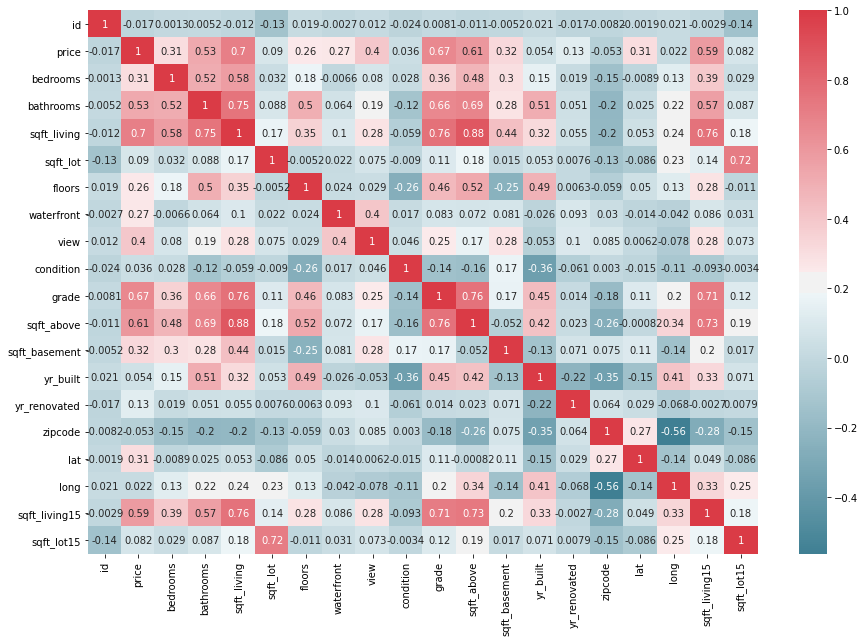

In [15]:
# correlation using heatmap
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
correlation_heatmap(data)

In [0]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
# Dividing data into test and train data
train, test = train_test_split(data, train_size =0.8043307268773423, random_state = 3)

# separting labels from train and test data 
x_train = train.drop(labels = ["price"],axis = 1)
y_train = train["price"]
x_test = test.drop(labels = ["price"],axis = 1)
y_test = test["price"]


In [22]:
# Polynoial Regression with selected features
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
for i in [2,3,4]:
  polyFeatures = pf(degree = i)
  x_train_pf = polyFeatures.fit_transform(x_train[features])
  x_test_pf = polyFeatures.fit_transform(x_test[features])
  polyReg = linear_model.LinearRegression()
  polyReg.fit(x_train_pf, y_train,)
  predictions = polyReg.predict(x_test_pf)
  
  mse_train = metrics.mean_squared_error(y_train, polyReg.predict(x_train_pf))
  mse = metrics.mean_squared_error(y_test, predictions)
  print('Mean Squared Error (MSE) on train data ', mse_train)
  print('Mean Squared Error (MSE) on test data ', mse)
  print('R-squared on train data ', round(polyReg.score(x_train_pf, y_train), 3))
  print('R-squared on test data ', round(polyReg.score(x_test_pf, y_test), 3))



Mean Squared Error (MSE) on train data  42693284859.60962
Mean Squared Error (MSE) on test data  60932970479.45794
R-squared on train data  0.656
R-squared on test data  0.657


18
Mean Squared Error (MSE) on train data  37341833949.94964
Mean Squared Error (MSE) on test data  54064893984.443596
R-squared on train data  0.699
R-squared on test data  0.696


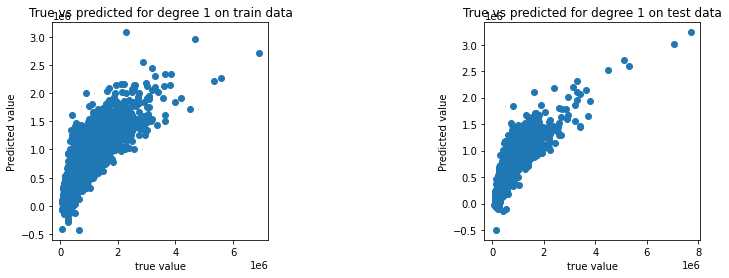

In [43]:
features = x_train.columns.tolist()
features = features[2:]     #Removing id and date
degrees = [1]
train_error = []
test_error = []

for i in degrees:
  polyFeatures = pf(degree = i)
  x_train_pf = polyFeatures.fit_transform(x_train[features])
  x_test_pf = polyFeatures.fit_transform(x_test[features])
  polyReg = linear_model.LinearRegression()
  polyReg.fit(x_train_pf, y_train)
  predictions = polyReg.predict(x_test_pf)
  pred_train = polyReg.predict(x_train_pf)
  mse_train = metrics.mean_squared_error(y_train, pred_train)
  mse = metrics.mean_squared_error(y_test, predictions)
  print('Mean Squared Error (MSE) on train data ', mse_train)
  print('Mean Squared Error (MSE) on test data ', mse)
  print('R-squared on train data ', round(polyReg.score(x_train_pf, y_train), 3))
  print('R-squared on test data ', round(polyReg.score(x_test_pf, y_test), 3))
  train_error.append(mse_train)
  test_error.append(mse)

  # plottin true vs predicted
  plt.subplot(121)
  plt.scatter(y_train, pred_train)
  plt.xlabel("true value");
  plt.ylabel("Predicted value");
  plt.title("True vs predicted for degree %i on train data" %i)
  plt.subplot(122)
  plt.scatter(y_test, predictions)
  plt.xlabel("true value");
  plt.ylabel("Predicted value");
  plt.title("True vs predicted for degree %i on test data" %i)
  plt.subplots_adjust(left=1, bottom=None, right=2.5, top=None, wspace=1, hspace=None,)
  plt.show()



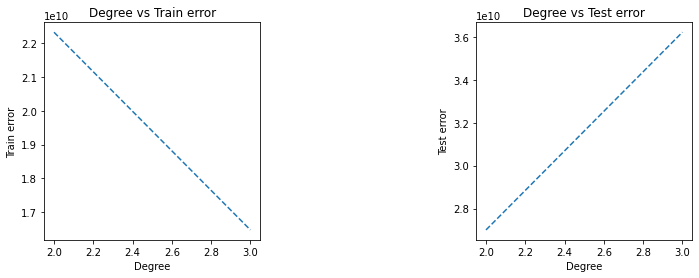

In [24]:
# plotting train and test errors for d
plt.subplot(121)
plt.plot(degrees, train_error, "--" )
plt.xlabel("Degree")
plt.ylabel("Train error")
plt.title("Degree vs Train error")
plt.subplot(122)
plt.plot( degrees, test_error, "--")
plt.xlabel("Degree")
plt.ylabel("Test error")
plt.title("Degree vs Test error")
plt.subplots_adjust(left=1, bottom=None, right=2.5, top=None, wspace=1, hspace=None)


In [44]:
weights = polyReg.coef_
intercept = polyReg.intercept_
print(weights)
print(intercept)


[ 0.00000000e+00 -3.20625507e+04  4.20469421e+04  1.00780558e+02
  1.56426548e-01  9.76141594e+03  5.07804693e+05  5.16653607e+04
  2.43857140e+04  9.70958777e+04  6.30898788e+01  3.76906794e+01
 -2.63120840e+03  1.61219099e+01 -5.48202676e+02  5.92282929e+05
 -1.94791972e+05  2.83647673e+01 -3.57544446e-01]
6288715.354646797


In [47]:
pd.DataFrame({"Feature":np.asanyarray(features),"Coefficients":np.transpose(weights[1:])})


,Feature,Coefficients
0,bedrooms,-32062.550679
1,bathrooms,42046.942084
2,sqft_living,100.780558
3,sqft_lot,0.156427
4,floors,9761.415945
5,waterfront,507804.693365
6,view,51665.360702
7,condition,24385.713958
8,grade,97095.877674
9,sqft_above,63.089879


In [73]:
# Ridge Regression
# use x_train x_test  and copy weights from least squares i.e degree =1 

ls_sum_wts = np.sum(weights**2)
model = linear_model.RidgeCV(alphas= np.logspace(-2, 2, 5))
model.fit(x_train[features],y_train)

print("alpha",model.alpha_)
pred = model.predict(x_train[features])
mse = metrics.mean_squared_error(y_train, pred)
print(mse) 

alpha 1.0
37342849245.47879


In [71]:
model.coef_

array([-2.14170896e+04,  1.45144058e+04,  1.34751092e+02,  6.82530261e-02,
        1.23060765e+04,  6.93346573e+03,  3.40318972e+04,  7.77805146e+03,
        5.57444540e+04,  7.14453448e+01,  6.33057472e+01, -2.73549381e+03,
        2.89431365e+01,  1.69748245e+02,  1.74368410e+04, -4.79131759e+03,
        6.58660295e+01, -6.42738001e-01])